In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

## Import data obtained in drc_n100.py or drc_n400.py

In [2]:
data_dir = '/Dynamic_Rank_Centrality' # Path of the folder where the results of drc_n100.py are saved
data_type = '_N100'
# data_type = '_N400' #Uncomment to use data from drc_n400.py

In [5]:
with open(data_dir+'/parameters_RC'+data_type+'.txt', "rb") as param:
    parameters = pickle.load(param)
     
with open(data_dir+'/MSE_RC'+data_type+'.txt', "rb") as mse_rc:
    MSE_RC = pickle.load(mse_rc)
        
with open(data_dir+'/MSE_MLE'+data_type+'.txt', "rb") as mse_mle:
    MSE_MLE = pickle.load(mse_mle)
    
with open(data_dir+'/borda_count'+data_type+'.txt', "rb") as Borda:
    borda = pickle.load(Borda)
    
with open(data_dir+'/error_MLE'+data_type+'.txt', "rb") as error_mle:
    error_MLE = pickle.load(error_mle)
    
with open(data_dir+'/error_RC'+data_type+'.txt', "rb") as error_rc:
    error_RC = pickle.load(error_rc)

In [6]:
list_N,list_T = parameters[0:2]

mean_MSE_RC = np.zeros((len(list_N),len(list_T)))
mean_MSE_MLE = np.zeros((len(list_N),len(list_T)))
var_MSE_RC = np.zeros((len(list_N),len(list_T)))
var_MSE_MLE = np.zeros((len(list_N),len(list_T)))
med_MSE_RC = np.zeros((len(list_N),len(list_T)))
med_MSE_MLE = np.zeros((len(list_N),len(list_T)))

mean_error_RC = np.zeros((len(list_N),len(list_T)))
mean_error_MLE = np.zeros((len(list_N),len(list_T)))
mean_error_borda = np.zeros((len(list_N),len(list_T)))

for i in range(len(list_N)):
    data_RC_box = []
    data_MLE_box = []
    for j in range(len(list_T)):
        # MSE for each value of n and T , for DRC and MLE methods
        tab_mse_RC = MSE_RC[i][j]
        tab_mse_MLE = MSE_MLE[i][j]
        # Compute the mean of the errors for these values of n and T 
        mean_MSE_RC[i,j] = np.mean(tab_mse_RC)
        mean_MSE_MLE[i,j] = np.mean(tab_mse_MLE)
        
        # Create flat array of data used in a boxplot
        data_RC_box.append(np.ravel(tab_mse_RC))
        data_MLE_box.append(np.ravel(tab_mse_MLE))
        
        # Error D_w(\sigma) for each value of n and T , for DRC, MLE and Borda Count methods
        tab_error_RC = error_RC[i][j]
        tab_error_MLE = error_MLE[i][j]
        tab_borda = borda[i][j]
        # Compute the mean of the errors for these values of n and T 
        mean_error_RC[i,j] = np.mean(tab_error_RC)
        mean_error_MLE[i,j] = np.mean(tab_error_MLE)
        mean_error_borda[i,j] = np.mean(tab_borda)

# Plots

## Set figures parameters

In [7]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Evolution of the error metric \\(D_w(\sigma)\\) within T

Failed to find a Ghostscript installation.  Distillation step skipped.


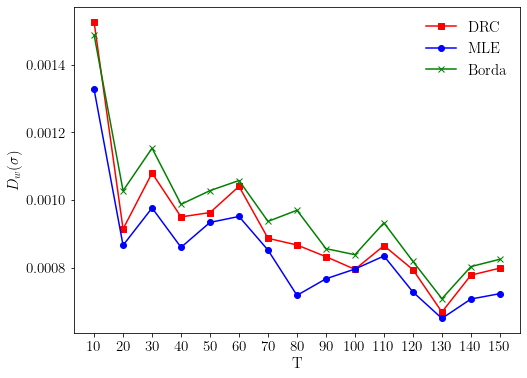

In [11]:
# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(list_T, mean_error_RC[0,:], marker='s',color="red", label="DRC")
ax.plot(list_T, mean_error_MLE[0,:], marker='o',color="blue", label="MLE")
ax.plot(list_T, mean_error_borda[0,:], marker='x',color="green", label="Borda")

ax.set_xticks(list_T)
ax.set_xlabel('T')
ax.set_ylabel('$D_w(\sigma)$')

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)

plt.show()

## Evolution of the MSE within T

Failed to find a Ghostscript installation.  Distillation step skipped.


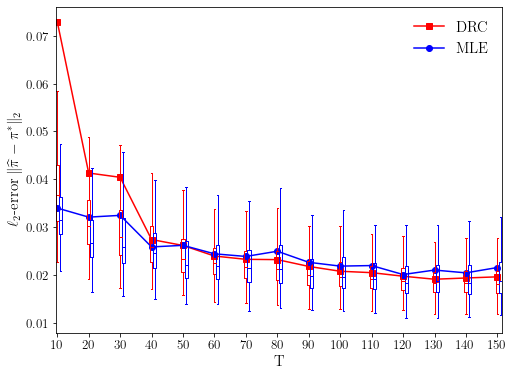

In [21]:
# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(list_T, mean_MSE_RC[0,:],marker='s', color="red", label="DRC")
ax.plot(list_T, mean_MSE_MLE[0,:],marker='o', color="blue", label="MLE")

box_RC = ax.boxplot(data_RC_box,showfliers=False,positions=list_T,widths = 1)
box_MLE = ax.boxplot(data_MLE_box,showfliers=False,positions=list_T+1,widths = 1)
# change the color of its elements 
for _, line_list in box_RC.items(): 
    for line in line_list: 
        line.set_color('red') 
        
for _, line_list in box_MLE.items(): 
    for line in line_list: 
        line.set_color('blue') 

ax.set_xticks(list_T)
#ax.tick_params(axis='both', labelsize=13)
ax.set_xlabel('T')
ax.set_ylabel('$\ell_2$-error $\|\widehat{\pi} - \pi^*\|_2$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.show()